In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Important libraries have been imported')

Important libraries have been imported


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-happiness-report-2024-yearly-updated


In [3]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv")
df.head()
#df.count()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [4]:
df.count()

Country name                    143
Regional indicator              143
Ladder score                    143
upperwhisker                    143
lowerwhisker                    143
Log GDP per capita              140
Social support                  140
Healthy life expectancy         140
Freedom to make life choices    140
Generosity                      140
Perceptions of corruption       140
Dystopia + residual             140
dtype: int64

In [4]:
#How many columns are present in the dataset?
count = 0
for i in df.columns.values:
    count += 1
print('number of columns is', count)

number of columns is 12


In [5]:
#Let's take some informations about columns and their values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


From above we see that apart from the top five columns all others columns contains some null values. We will find where they are present and try to do something with them.

In [6]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

There are three null values represented by NaN in given dataframe. We will find these rows containing these NaN values

In [7]:
df[df.isna().any(axis = 1)]
#df.loc[100:150]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here the country Bahrain, Tajikistan, and State of Palestine have null values in their rows.

In [8]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


 #  Let's check for duplicates

In [9]:
df.duplicated().sum()
#df[["Country name", "Regional indicator"]]. duplicated().sum()

0

There is no duplicate rows in the given dataframe

In [10]:
#The unique regional indicators present in the column
df["Regional indicator"].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

# Analysing the Ladder score with respect to the regional indicator 

We now group by the column Regional indicator with mean value of ladder score to have some idea about regin wise happiness variations

In [11]:
group_regional_indicator = df.groupby("Regional indicator").agg({"Ladder score":"mean"})
group_regional_indicator.sort_values("Ladder score", ascending = False)

,Ladder score
Regional indicator,
North America and ANZ,6.927750
Western Europe,6.841650
Central and Eastern Europe,6.170941
Latin America and Caribbean,6.143368
East Asia,5.934333
Southeast Asia,5.551889
Commonwealth of Independent States,5.538500
Middle East and North Africa,5.199941
Sub-Saharan Africa,4.329686


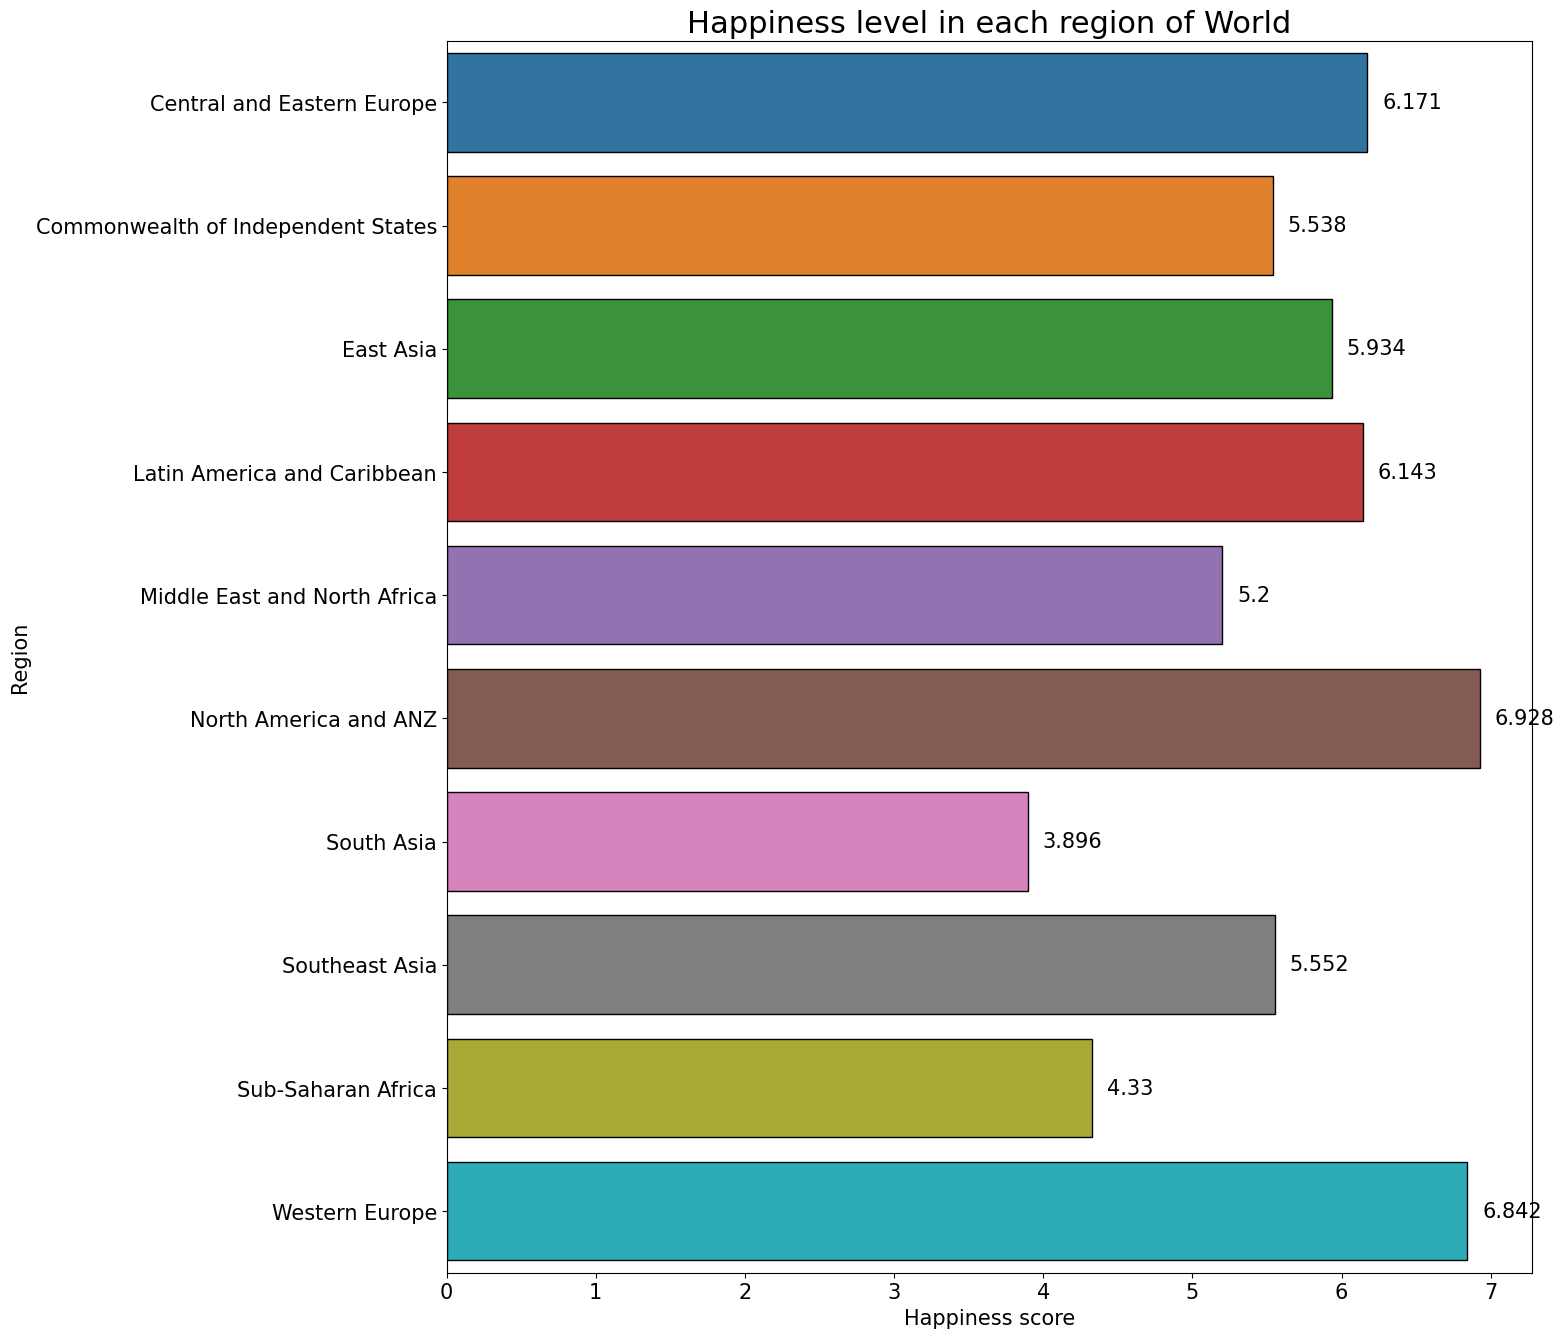

In [12]:
plt.figure(figsize = (14,16))
p = sns.barplot(y = group_regional_indicator.index, x = "Ladder score", data = group_regional_indicator, edgecolor = 'black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
for i, j in enumerate(group_regional_indicator['Ladder score']):
    plt.text(j+0.1, i, str(round(j,3)), ha = 'left', va = 'center', fontsize = 15)
plt.title("Happiness level in each region of World", fontsize = 22)
plt.xlabel("Happiness score", fontsize = 15)
plt.ylabel("Region", fontsize = 15);

In [13]:
df_dropna = df.dropna()
total_counts = df_dropna['Country name'].count()
lower_than_avg = df_dropna[df_dropna['Ladder score']<5.528]
lower_than_avg_count = lower_than_avg['Country name'].count()
percent_lower_avg = (lower_than_avg_count/total_counts)*100
print("Total no of countries to be considered is", total_counts)
print("Total no of countries having lower happiness score than avg is", lower_than_avg_count)
print("The percentage of country lower than avg happiness is", percent_lower_avg,"%")

Total no of countries to be considered is 140
Total no of countries having lower happiness score than avg is 61
The percentage of country lower than avg happiness is 43.57142857142857 %


#### The Key takeaways 

* The North America and ANZ being the happiest region while the South Asia being the least happy region.
* The mean happiness score is 5.528. There are 3 regions in the world namely "Southern Asia", "Sub Saharan Africa" and "Middle East and North Africa" whose happiness score is lower than the average happiness score.
* Also there 61 countries(out of 140 on which study was conducted) or 43% of total countries whose happiness score is lower than the average score.

## Analysis of Factors contributing to Happiness 
* Log GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity 

### Log GDP per capita

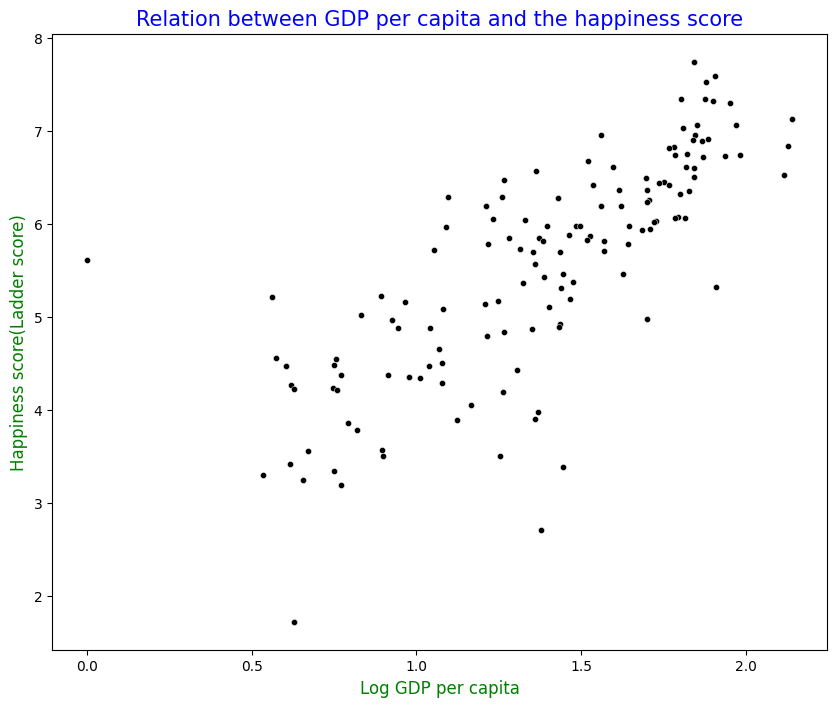

In [14]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Log GDP per capita', y = 'Ladder score', data = df_dropna, s = 20, c = 'black')
plt.title('Relation between GDP per capita and the happiness score', fontsize = 15, c = 'b')
plt.xlabel('Log GDP per capita',fontsize = 12, c = 'green')
plt.ylabel('Happiness score(Ladder score)', fontsize = 12, c = 'green');

In [41]:
#Correlation between GDP per capita and the Happiness score 
correlation1 = df_dropna['Log GDP per capita'].corr(df_dropna['Ladder score'])
print(f'The correlation between GDP per capita and the happiness is {correlation1}.')

The correlation between GDP per capita and the happiness is 0.768503682450489.


It has been observed that the GDP per capita of a country is positively correlated with the happiness scores. The country having higher GDP per capita tend to be more happy.

### Social Support 

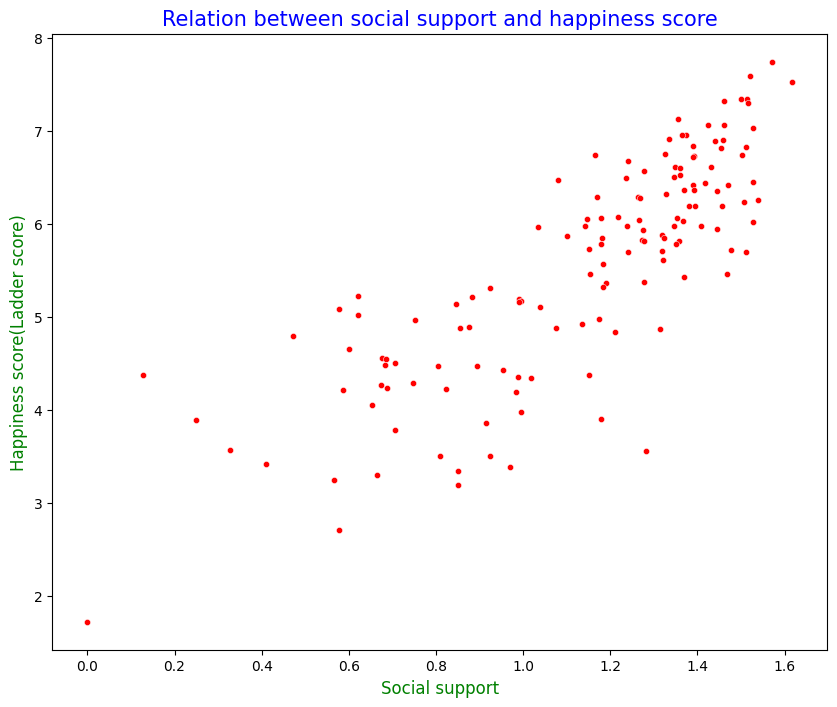

In [15]:
#df_dropna
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Social support', y = 'Ladder score', data = df_dropna, s = 20, c = 'r')
plt.title('Relation between social support and happiness score', fontsize = 15, c = 'b')
plt.xlabel('Social support', fontsize = 12, c = 'green')
plt.ylabel('Happiness score(Ladder score)', fontsize = 12, c = 'green');

In [42]:
#Correlation between social support and the Happiness score
correlation2 = df_dropna['Social support'].corr(df_dropna['Ladder score'])
print(f'The correlation between Social support and the happiness score is {correlation2}.')

The correlation between Social support and the happiness score is 0.8135420015083891.


As the social support for a nation increases, the happiness scores are also moving ahead.

### Life expectancy 

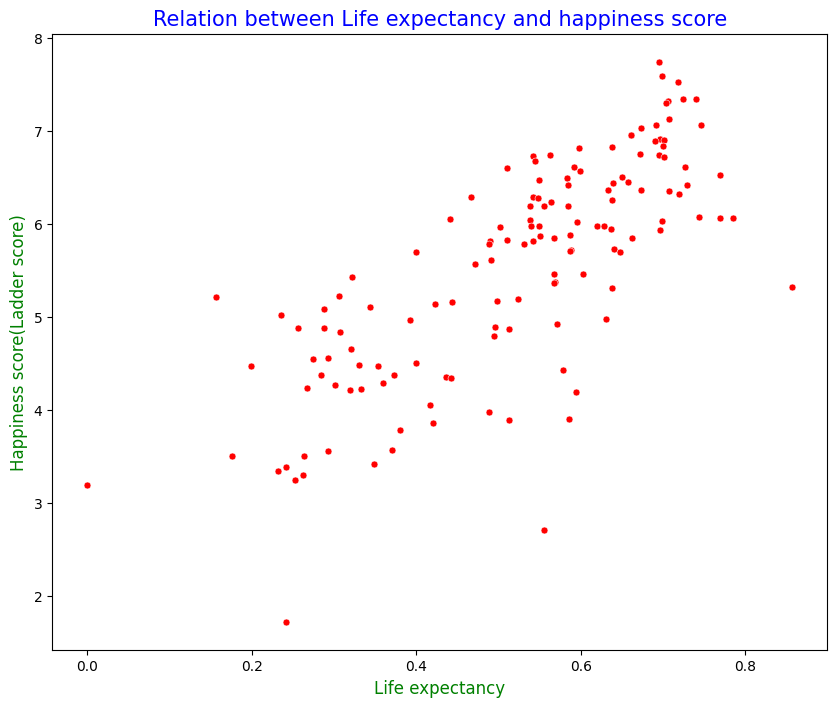

In [16]:
#df_dropna
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Healthy life expectancy', y = 'Ladder score', data = df_dropna, s = 25, c = 'r')
plt.title('Relation between Life expectancy and happiness score', fontsize = 15, c = 'b')
plt.xlabel('Life expectancy', fontsize = 12, c = 'green')
plt.ylabel('Happiness score(Ladder score)', fontsize = 12, c = 'green');

In [43]:
#Correlation between Happiness score and the Healthy life expectancy 
correlation3 = df_dropna['Healthy life expectancy'].corr(df_dropna['Ladder score'])
print(f'The correlation between Healthy life expectancy and the happiness score is {correlation3}.')

The correlation between Healthy life expectancy and the happiness score is 0.7596593784588567.


From the above plot, we see the positive slope between Happiness score and the life expectancy of different countries. Countries having higher score on happiness index likely to be more happier.

### Freedom 

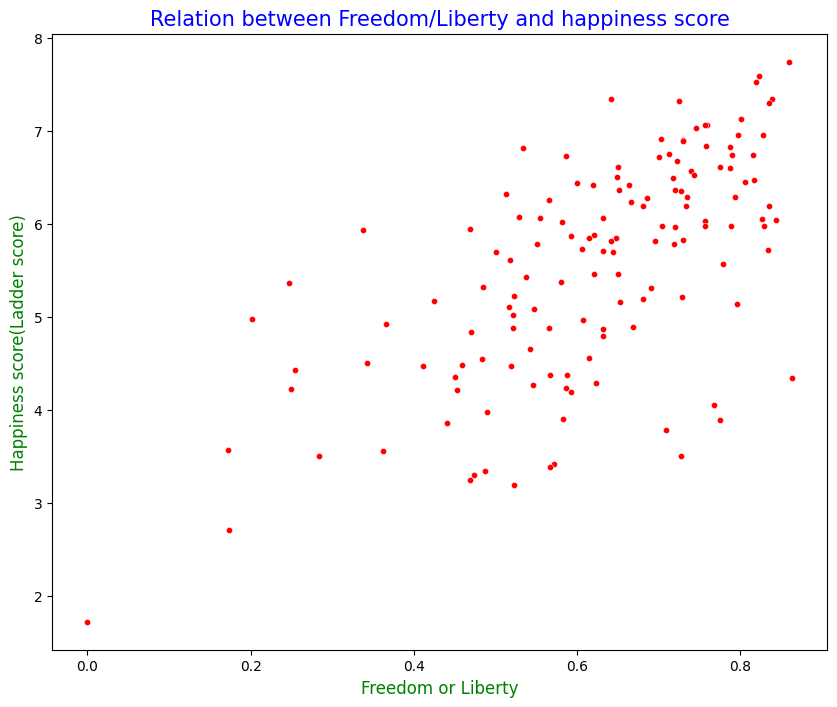

In [17]:
#df_dropna
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Freedom to make life choices', y = 'Ladder score', data = df_dropna, s = 20, c = 'r')
plt.title('Relation between Freedom/Liberty and happiness score', fontsize = 15, c = 'b')
plt.xlabel('Freedom or Liberty', fontsize = 12, c = 'green')
plt.ylabel('Happiness score(Ladder score)', fontsize = 12, c = 'green');

In [44]:
#Correlation between Freedom/Liberty and the Happiness score
correlation4 = df_dropna['Freedom to make life choices'].corr(df_dropna['Ladder score'])
print(f'The correlation between Freedom or Liberty and the happiness score is {correlation4}.')

The correlation between Freedom or Liberty and the happiness score is 0.6444511472915279.


Here the plot is showing the positive correlation between the freedom of people and the happiness score. However there are few regions where freedom level is better but the happiness score is not desirable.

### Effect of Corruption 

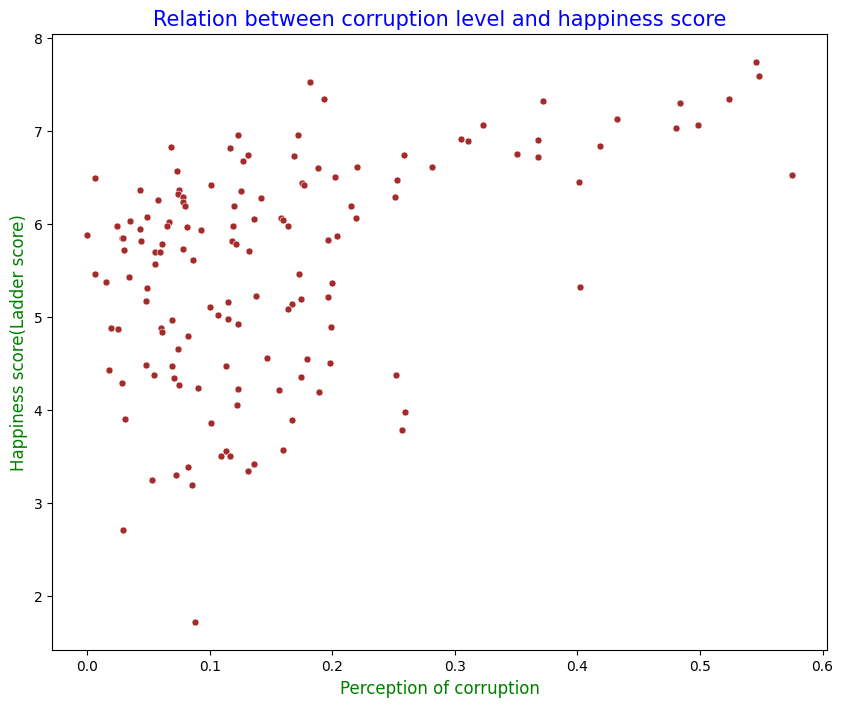

In [18]:
#df_dropna
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Perceptions of corruption', y = 'Ladder score', data = df_dropna, s = 25, c = 'brown')
plt.title('Relation between corruption level and happiness score', fontsize = 15, c = 'b')
plt.xlabel('Perception of corruption', fontsize = 12, c = 'green')
plt.ylabel('Happiness score(Ladder score)', fontsize = 12, c = 'green');

In [46]:
#Correlation between Perceptions of corruption and the Happiness score
correlation5 = df_dropna['Perceptions of corruption'].corr(df_dropna['Ladder score'])
print(f'The correlation between Perception of corruption and the happiness score is {correlation5}.')

The correlation between Perception of corruption and the happiness score is 0.4518290387140597.


In [19]:
avg_happiness_score = df_dropna['Ladder score'].mean()
avg_corruption_level = df_dropna['Perceptions of corruption'].mean()
df_highavg_score = df_dropna[df_dropna['Ladder score']>avg_happiness_score]
df_result = df_highavg_score[df_highavg_score['Perceptions of corruption']>avg_corruption_level]
count = df_result['Country name'].count()
percentage = (count/79)*100 #there are 79 countries whose happiness score is more than its average score
print("Percent of countries which have corruption more than its average but the happiness score greater than its average value = ", percentage, '%')

Percent of countries which have corruption more than its average but the happiness score greater than its average value =  46.835443037974684 %


Here we can see that the countries having less perception of corruption or country likely to have less corruption level tend to be more happier.
However there are some countries which have higher happiness score(some has highest) as well as high level of corruption. Out of total 56.4% of countries having ladder score(happiness score) higher than its average, about 46.8% of the countries have corruption level more than its average.
There are also many countries whose happiness scores are low and the corruption level is also low, may there would be other factors which can be responsible for this variation.

### Generosity 

It measures the degree to which people are willing to helpothers.

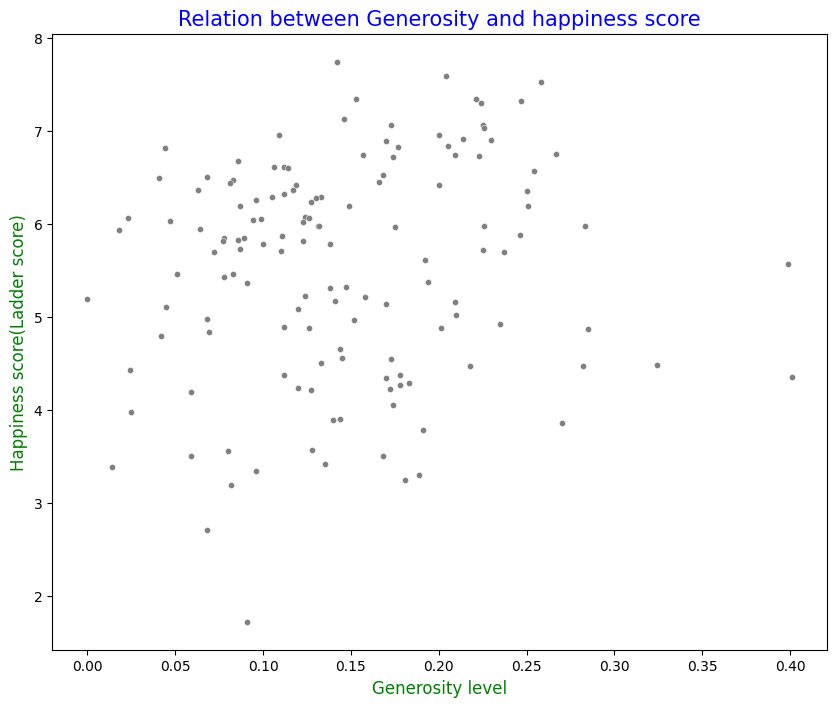

In [20]:
#df_dropna
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Generosity', y = 'Ladder score', data = df_dropna, s = 20, c = 'grey')
plt.title('Relation between Generosity and happiness score', fontsize = 15, c = 'b')
plt.xlabel('Generosity level', fontsize = 12, c = 'green')
plt.ylabel('Happiness score(Ladder score)', fontsize = 12, c = 'green');

In [47]:
#Correlation between Generosity and the Happiness score
correlation5 = df_dropna['Generosity'].corr(df_dropna['Ladder score'])
print(f'The correlation between Generosity and the happiness score is {correlation5}.')

The correlation between Generosity and the happiness score is 0.1300382339038509.


By observing the relationship between generosity and the happiness score, we see that there is no any significant connection between these two. There are many countries which has lower generosity score but have above average happiness score and vice versa.

### Dystopia Analysis 

"Dystopia" is a hypothetical country with the world's lowest average values for each of the six factors contributing to happiness. It essentially acts as a baseline and also captures factors that are not explained by the other six variables 

In [49]:
df_dropna.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


Now we are grouping our data frame on the Regional indicator and we would analyse about Dystopia

In [21]:
group_dystopia = df.groupby("Regional indicator").agg({"Dystopia + residual":"mean"})
group_dystopia.sort_values("Dystopia + residual", ascending = False)

,Dystopia + residual
Regional indicator,
Latin America and Caribbean,2.057474
North America and ANZ,1.689250
Central and Eastern Europe,1.656706
Western Europe,1.654350
Sub-Saharan Africa,1.562086
Commonwealth of Independent States,1.404667
Southeast Asia,1.360111
East Asia,1.340833
Middle East and North Africa,1.325067


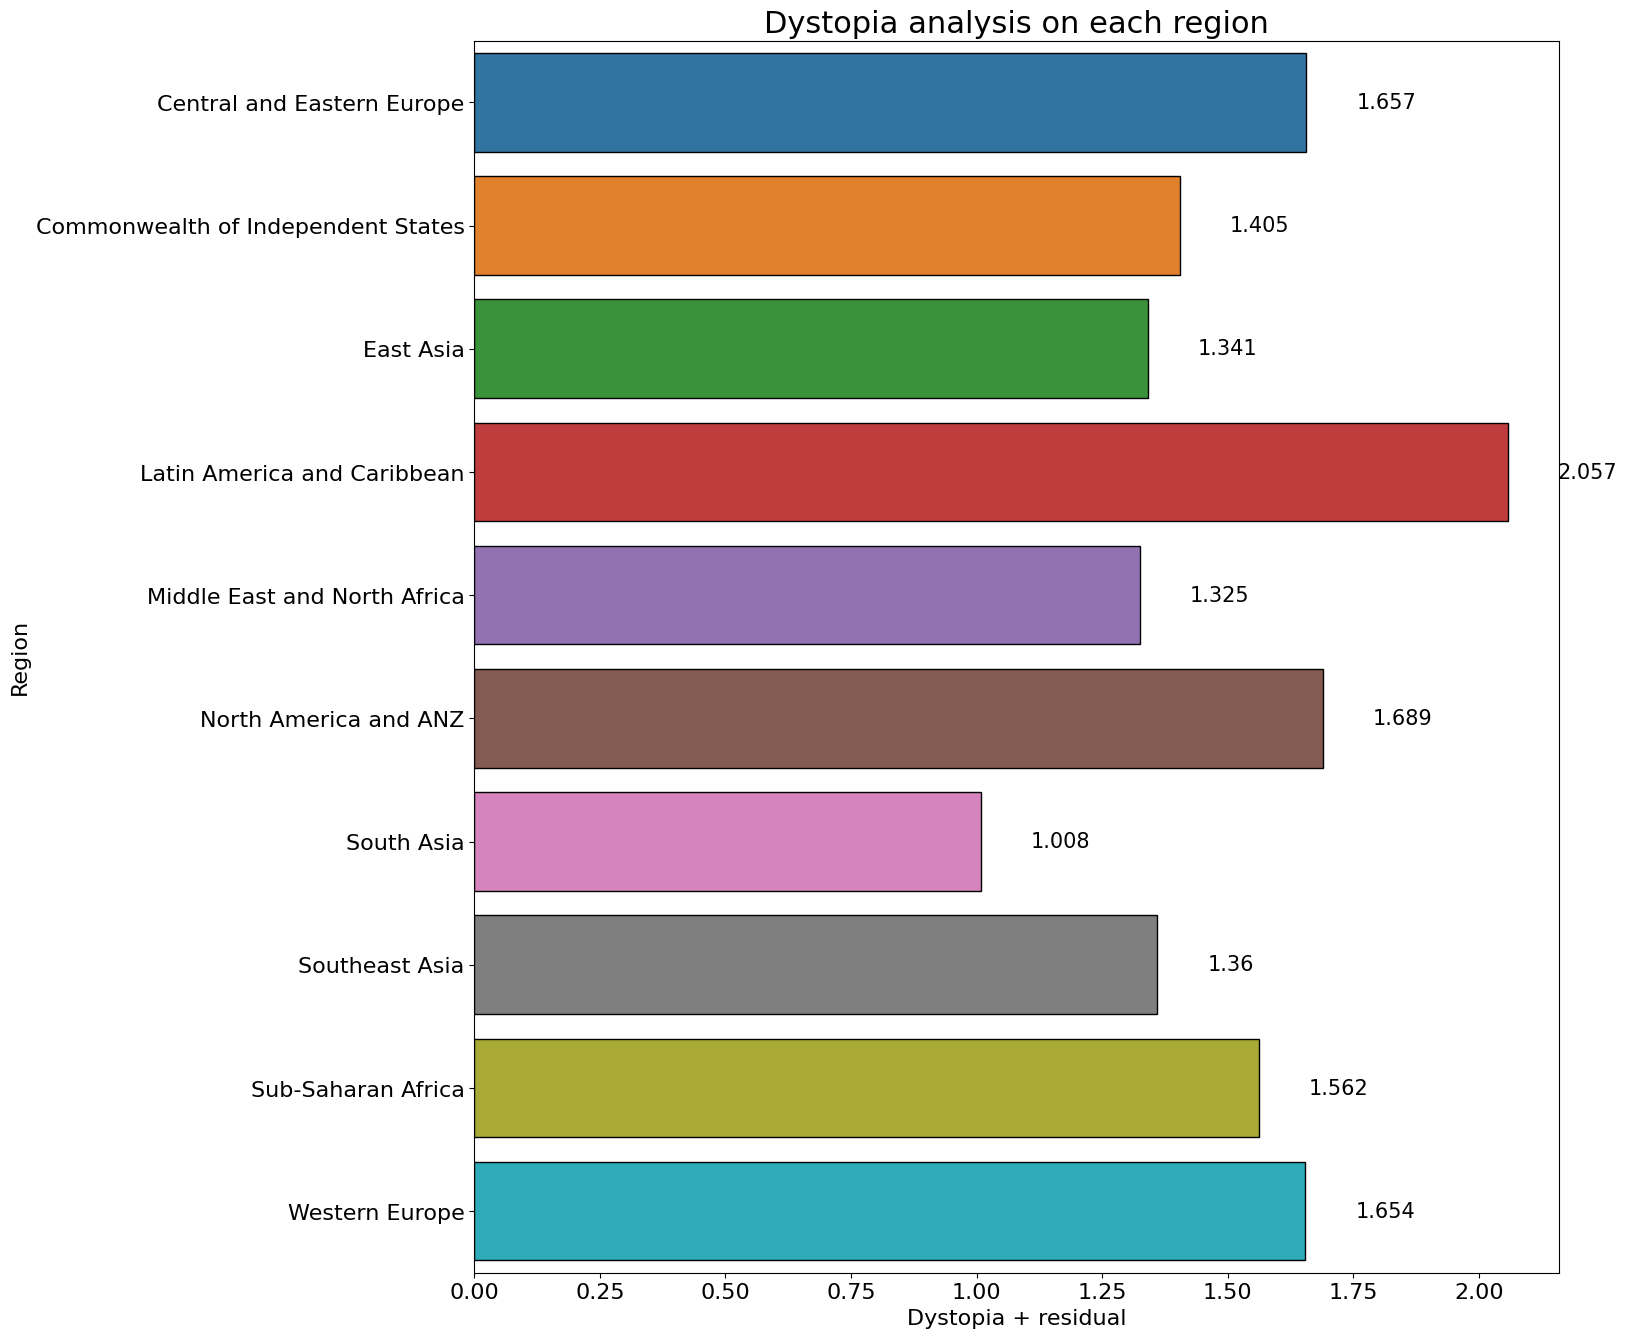

In [22]:
plt.figure(figsize = (14,16))
p = sns.barplot(y = group_dystopia.index, x = "Dystopia + residual", data = group_dystopia, edgecolor = 'black', linewidth = 1)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
for i, j in enumerate(group_dystopia['Dystopia + residual']):
    plt.text(j+0.1, i, str(round(j,3)), ha = 'left', va = 'center', fontsize = 15)
plt.title("Dystopia analysis on each region", fontsize = 22)
plt.xlabel("Dystopia + residual", fontsize = 16)
plt.ylabel("Region", fontsize = 16);

In [23]:
average_dystopia = df_dropna[df_dropna['Dystopia + residual']<1.576]
count_average = average_dystopia['Country name'].count()
percent_lower = (count_average/140)*100
print(percent_lower, '% of the countries score below average dystopia score')

43.57142857142857 % of the countries score below average dystopia score


* On analysiing the region wise dystopia score, we observe that the average dystopia value is 1.576. The 'Latin America and Caribbean' has the highest dystopia score of 2.057, while 'South Asia' has the lowest dystopia score of 1.009.
* There are four regions which have dystopia score higher than it's average viz. 'Central and Eastern Europe'(1.657), 'Latin America and Caribbean '(2.057), 'North America and ANZ'(1.689) and 'Western Europe'(1.654).
* There are about 43.57% of countries which has dystopia score below its national average.

## Questions 

**1. A table that contains the number of countries in each regional indicator which have below average ladder scor of happiness score. For understanding in better way, we can have a bar graph to represent them.**

In [24]:
avg_ladder_score = 5.527580
table_below_avg_score = df_dropna[df_dropna['Ladder score'] < avg_ladder_score]
below_avg_table = table_below_avg_score.groupby('Regional indicator').agg({'Country name':'count'})
below_avg_table

,Country name
Regional indicator,
Central and Eastern Europe,3
Commonwealth of Independent States,4
East Asia,1
Middle East and North Africa,10
South Asia,6
Southeast Asia,3
Sub-Saharan Africa,34


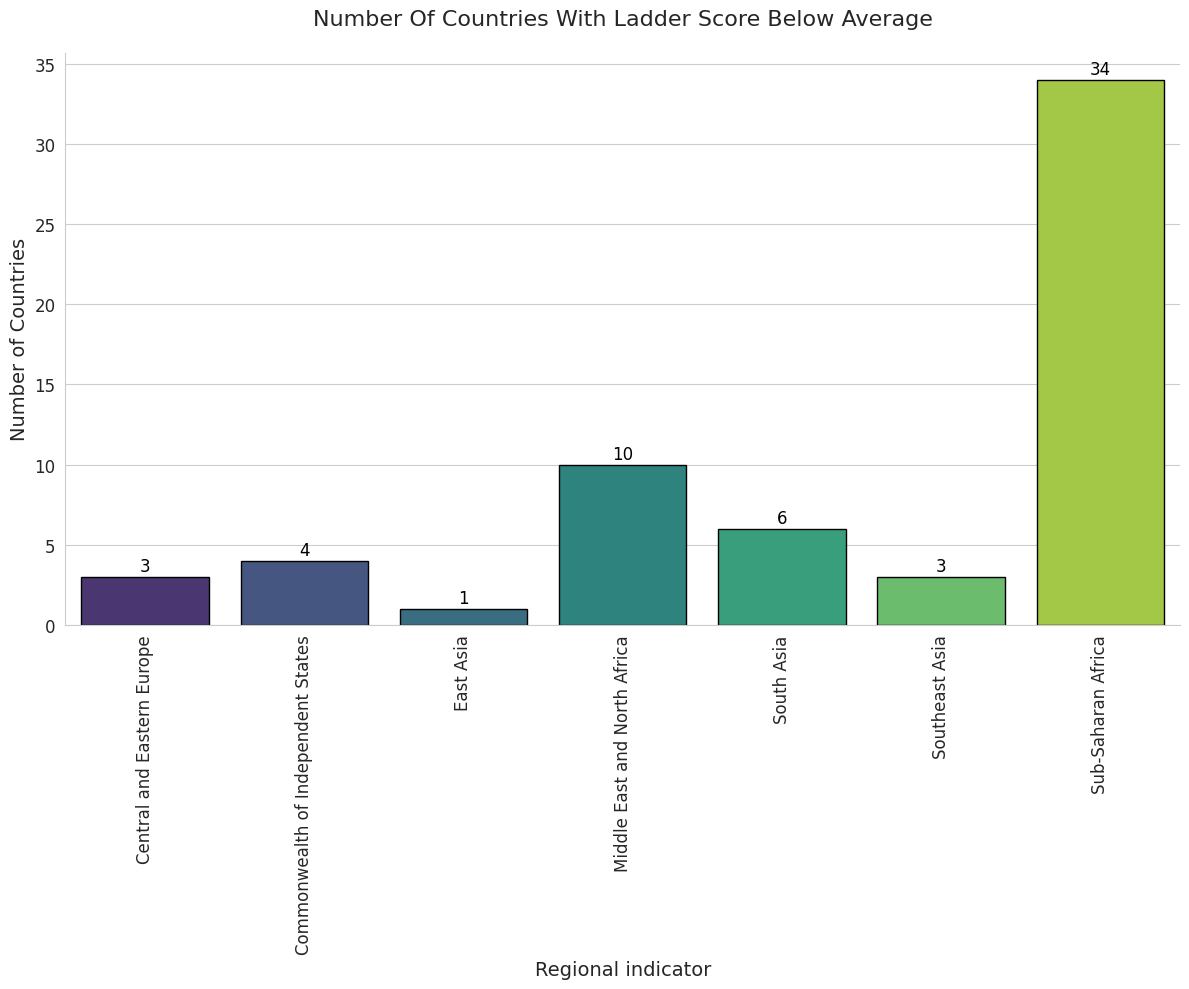

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,10)) #set figure size 
sns.barplot(x = below_avg_table.index, y = 'Country name',
           data = below_avg_table,
           palette = 'viridis',
           edgecolor = 'black')
#Add values on top of bars
for i, value in enumerate(below_avg_table['Country name']):
    plt.text(i, value+0.1, str(value), ha = 'center', va = 'bottom',
            fontsize = 12, color = 'black')
#Add labels and title
plt.xlabel('Regional indicator', fontsize = 14)
plt.ylabel('Number of Countries', fontsize = 14)
plt.title('Number Of Countries With Ladder Score Below Average',
          fontsize = 16, pad = 20)
#Customize tick labels
plt.xticks(rotation = 90, fontsize = 12), plt.yticks(fontsize = 12)
#Remove spines
sns.despine()
plt.tight_layout()
plt.show()

From above graph we observe that the 'Sub-Saharan Africa' region contains the highest number of countries i.e. 34 countries which have scored below average happiness score. 'Middle East and North Africa' contains 10 countries which have happiness score below average. East Asia has only one country which has the below average happiness score.

**2. First find the countries which are among the bottom 10% countries. Also find which regions do they belong from the most.**

In [26]:
ten_percent = df_dropna['Country name'].count()*0.1 # 14
desc_table = df_dropna.sort_values('Ladder score')[['Country name', 'Ladder score', 'Regional indicator']]
bottom_ten_percent = desc_table.loc[142:129]
bottom_ten_percent

,Country name,Ladder score,Regional indicator
142,Afghanistan,1.721,South Asia
141,Lebanon,2.707,Middle East and North Africa
140,Lesotho,3.186,Sub-Saharan Africa
139,Sierra Leone,3.245,Sub-Saharan Africa
138,Congo (Kinshasa),3.295,Sub-Saharan Africa
137,Zimbabwe,3.341,Sub-Saharan Africa
136,Botswana,3.383,Sub-Saharan Africa
135,Malawi,3.421,Sub-Saharan Africa
134,Eswatini,3.502,Sub-Saharan Africa
133,Zambia,3.502,Sub-Saharan Africa


If we talk about the bottom of 10 percent countries having the lowest happiness score, then there are 14 countries in which 'Afghanistan' has the lowest score o 1.721 followed by Labanon, Lesotho, Sierr Leon having scores o 2.707, 3.186, 3.245 respectively. Information about other countries can be inferred through the following graph.

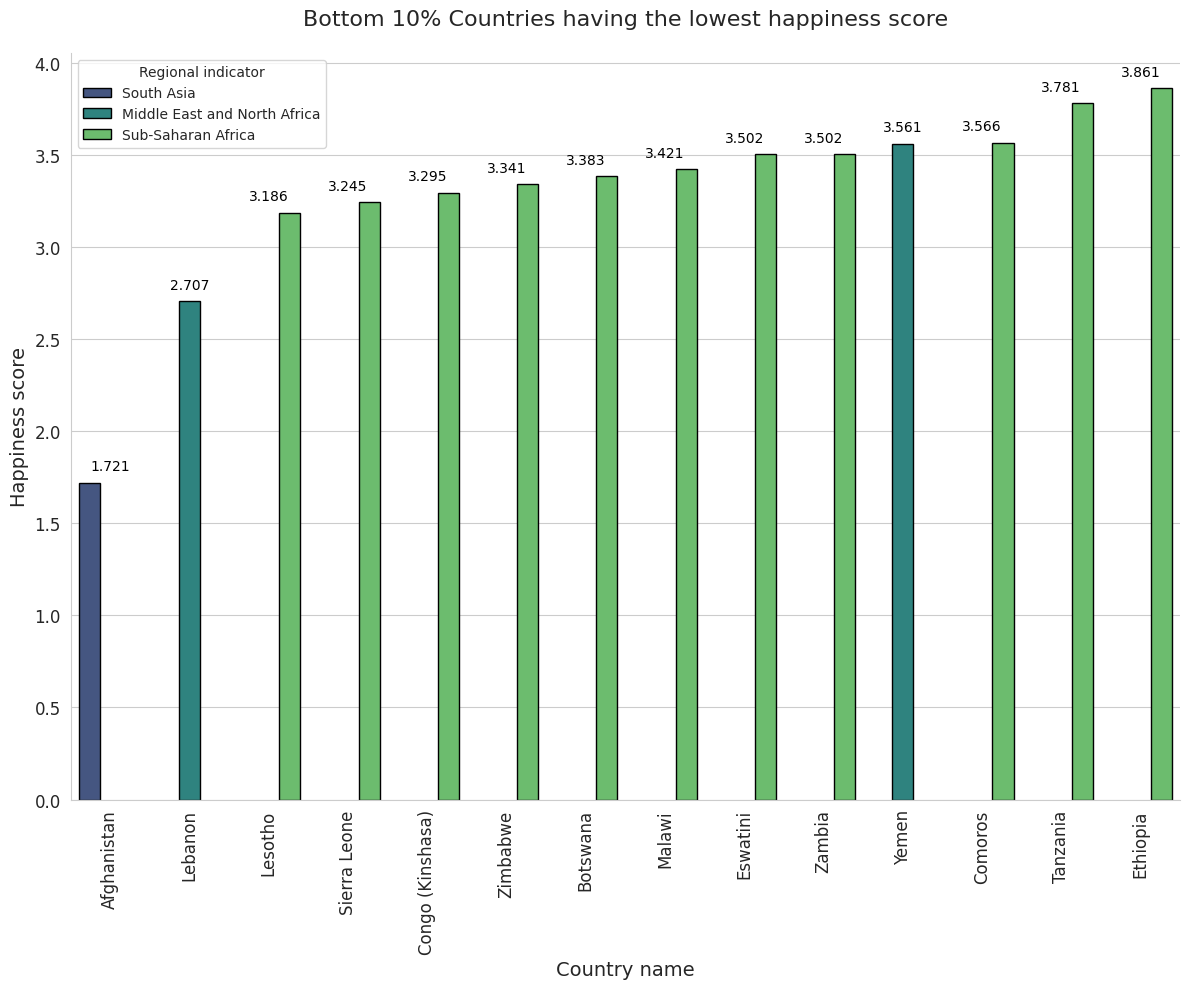

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,10)) #set figure size 
sns.barplot(x = 'Country name', y = 'Ladder score',
           data = bottom_ten_percent,
           palette = 'viridis',
           edgecolor = 'black', hue = 'Regional indicator')
#Add values on top of bars
for i, value in enumerate(bottom_ten_percent['Ladder score']):
    plt.text(i, value+0.05, str(value), ha = 'center', va = 'bottom',
            fontsize = 10, color = 'black')
#Add labels and title
plt.xlabel('Country name', fontsize = 14)
plt.ylabel('Happiness score', fontsize = 14)
plt.title('Bottom 10% Countries having the lowest happiness score', fontsize = 16, pad = 20)
#Customize tick labels
plt.xticks(rotation = 90, fontsize = 12), plt.yticks(fontsize = 12)
#Remove spines
sns.despine()
plt.tight_layout()
plt.show()

From the above graph, we can observe that out of total 14 bottom level countries, maximum number of countries i.e. 11 belong from 'Middle East and North Africa' and one from 'South Asia'.

**3. Name some countries (with regions) which are among all countries having above average happiness score inspite of below average GDP per capita.**

In [28]:
table_above_avg_score = df_dropna[df_dropna['Ladder score']>avg_ladder_score]
avg_gdp = df_dropna['Log GDP per capita'].mean()
result_table = table_above_avg_score[table_above_avg_score['Log GDP per capita']<avg_gdp]
result_percent = ((result_table['Country name'].count())/140)*100
result_table['Country name']
print(result_percent, "% of countries have above average happiness score inspite of having below average GDP per capita.")

11.428571428571429 % of countries have above average happiness score inspite of having below average GDP per capita.


About 11.43% of countries have above average happiness score inspite of having below average GDP per capita.

**4. What is the difference between average GDP per capita of the lowest happy region and the highest happy region.**

In [29]:
table_below_avg_score = df_dropna[df_dropna['Ladder score']<avg_ladder_score]
gdp_of_above_avg_score = table_above_avg_score['Log GDP per capita'].mean()
gdp_of_below_avg_score = table_below_avg_score['Log GDP per capita'].mean()
result_percent = ((gdp_of_above_avg_score - gdp_of_below_avg_score)/gdp_of_below_avg_score)*100
print("The GDP per capita of above average happy countries is about", result_percent, "% higher than that of below average happy countries.")

The GDP per capita of above average happy countries is about 53.377955750448145 % higher than that of below average happy countries.


The GDP per capita of above average happy countries is about 53.38% higher than that of below average happy countries.

**5. By how much percent the social support of the happiest nation is more than that of lowest happy nations. First between lowest and highest regions and then between lowest and highest country).**

In [30]:
# Difference in social support in the most happy and the least happy region
ss1 = df_dropna[df_dropna['Regional indicator'] == 'South Asia']['Social support'].mean()
ss2 = df_dropna[df_dropna['Regional indicator'] == 'North America and ANZ']['Social support'].mean()
percent_ss = ((ss2 - ss1)/ss1)*100
print(f'The social support of happiest region \'North America and ANZ\' is {percent_ss}% more than social support of least happy region South Asia.')

The social support of happiest region 'North America and ANZ' is 138.58621628983929% more than social support of least happy region South Asia.


We find that the North America and ANZ region being happiest region has 138.59% higher Social support than that of the least happy region South Asia.

In [31]:
# Difference in social support in the most happy and the least happy country
nss1 = df_dropna[df_dropna['Country name'] == 'Afghanistan']['Social support'].mean()
nss2 = df_dropna[df_dropna['Country name'] == 'Finland']['Social support'].mean()
npercent_ss = ((nss2 - nss1)/nss2)*100
print(f'The social support of happiest country \'Finland\' is {npercent_ss}% more than social support of least happy country \'Afghanistan\'.')

The social support of happiest country 'Finland' is 100.0% more than social support of least happy country 'Afghanistan'.


Similarly, the social support of the happiest country Finland is 100% higher than that of least happy country Afghanistan.

In [27]:
df_dropna.sort_values('Social support')[['Country name', 'Social support']]

,Country name,Social support
142,Afghanistan,0.000
115,Benin,0.128
128,Bangladesh,0.249
131,Comoros,0.328
135,Malawi,0.410
...,...,...
33,Estonia,1.527
55,Hungary,1.528
44,Slovakia,1.540
0,Finland,1.572


**6. How the life expectancy changes with different regional indicator? Show this with a suitable bar plot.
By how much percent the average life expectancy of above average region(ladder score) is higher than that of below average regions?**

In [32]:
#Function for categorising the scores for 'Above average happy' and 'Below average happy'
def category(value):
    if value < df_dropna['Ladder score'].mean():
        return "Below average happy"
    else:
        return "Above average happy"

#Grouping the dataframe df_dropna region wise on average Ladder score
group1 = df_dropna.groupby("Regional indicator").agg({"Ladder score":"mean"}).reset_index()
#Grouping the df_dropna region wise on average life expectancy 
group2 = df_dropna.groupby("Regional indicator").agg({"Healthy life expectancy":"mean"}).reset_index()
#Merging both,the group1 and group2 dataframes on regions
merge_groups = group1.merge(group2, on = "Regional indicator")
merge_groups["up_or_down"] = merge_groups["Ladder score"].apply(category)
merge_groups 

,Regional indicator,Ladder score,Healthy life expectancy,up_or_down
0,Central and Eastern Europe,6.170941,0.610412,Above average happy
1,Commonwealth of Independent States,5.567111,0.543556,Above average happy
2,East Asia,5.934333,0.681833,Above average happy
3,Latin America and Caribbean,6.143368,0.571158,Above average happy
4,Middle East and North Africa,5.170733,0.553200,Below average happy
5,North America and ANZ,6.927750,0.652000,Above average happy
6,South Asia,3.895667,0.420333,Below average happy
7,Southeast Asia,5.551889,0.520222,Above average happy
8,Sub-Saharan Africa,4.329686,0.297686,Below average happy
9,Western Europe,6.841650,0.709150,Above average happy


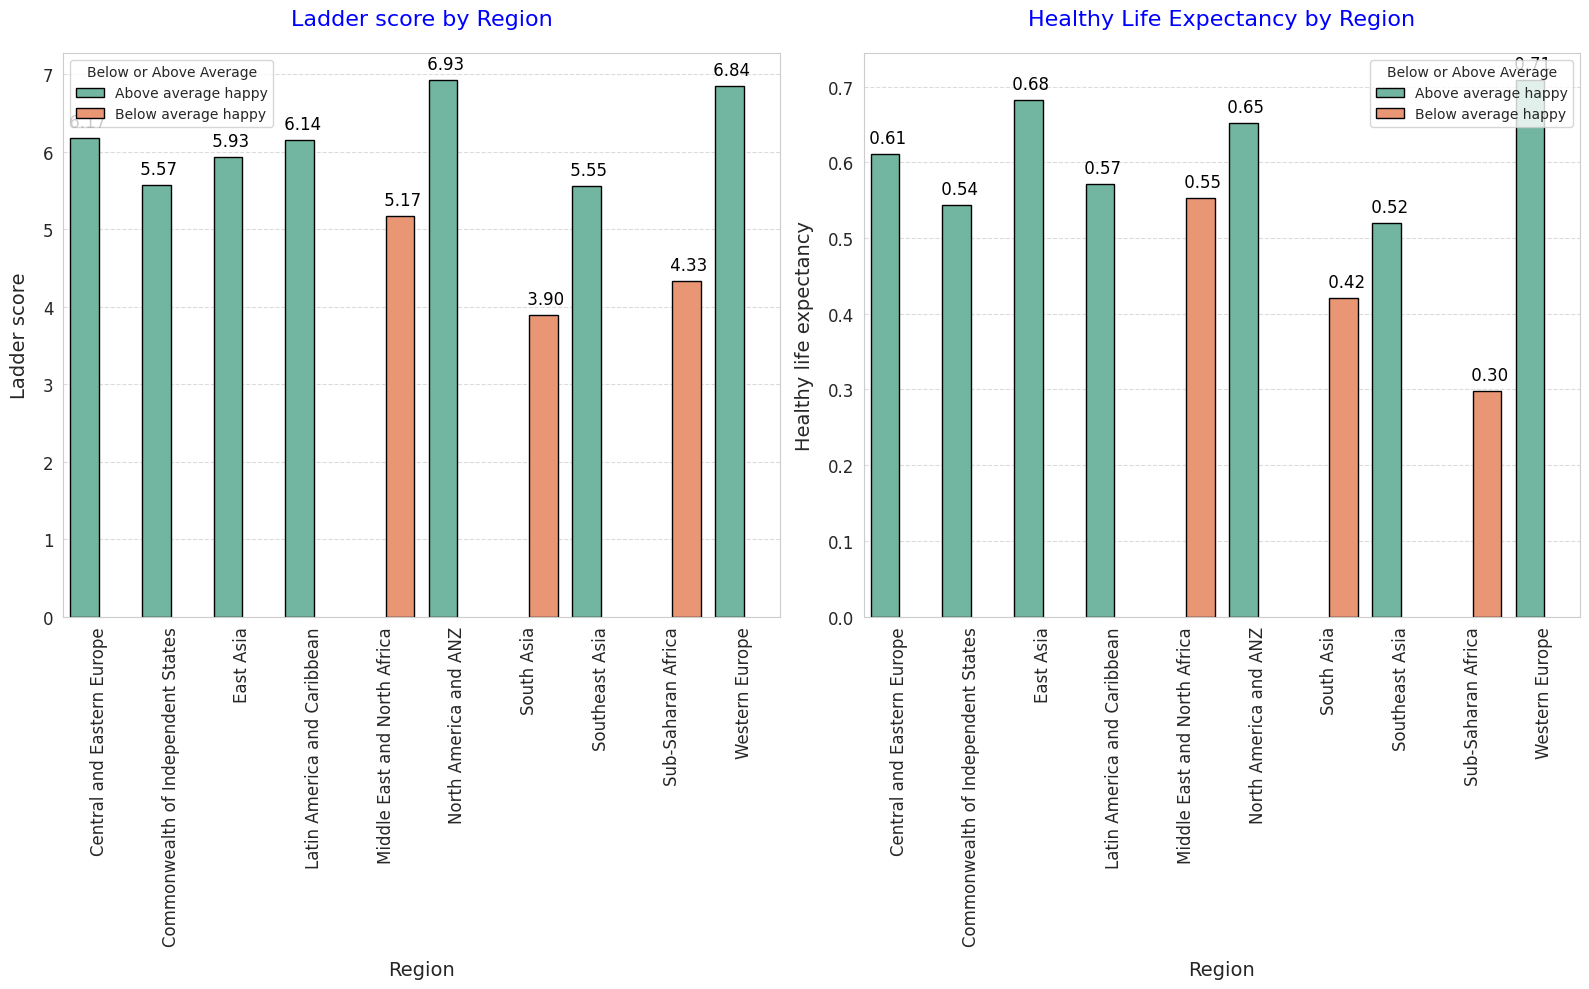

In [33]:
#Create a figure with two subplot
fig, axes = plt.subplots(1, 2, figsize = (16,10))
#plot 1: Ladder score
sns.barplot(x = 'Regional indicator', y = 'Ladder score', data = merge_groups, 
           palette = 'Set2', #use color palette
           edgecolor = 'black', #add black edges to bars
           linewidth = 1, hue = 'up_or_down',  #bar edge width
           ax = axes[0]) #plot on the first subplot
axes[0].set_title('Ladder score by Region', fontsize = 16, pad = 20, c = 'b')
axes[0].set_xlabel('Region', fontsize = 14, labelpad = 10)
axes[0].set_ylabel('Ladder score', fontsize = 14, labelpad = 10)
axes[0].tick_params(axis = 'x', rotation = 90, labelsize = 12)
axes[0].tick_params(axis = 'y', labelsize = 12)
axes[0].grid(axis = 'y', linestyle = '--', alpha = 0.7)
axes[0].legend(title = 'Below or Above Average',loc = 'best')
#Add value labels on top of bars for Ladder score
for p in axes[0].patches:
    axes[0].annotate(
        f'{p.get_height(): .2f}', 
        (p.get_x() + p.get_width()/2, p.get_height()), 
        ha = 'center', va = 'bottom', fontsize = 12, color = 'black', xytext = (0,5), 
        textcoords = 'offset points')
#Plot 2: Healthy life expectancy 
sns.barplot(x = 'Regional indicator', y = 'Healthy life expectancy', data = merge_groups, 
           palette = 'Set2', edgecolor = 'black', linewidth = 1, hue = 'up_or_down', ax = axes[1])
axes[1].set_title('Healthy Life Expectancy by Region', fontsize = 16, pad = 20, c = 'b')
axes[1].set_xlabel('Region', fontsize = 14, labelpad = 10)
axes[1].set_ylabel('Healthy life expectancy', fontsize = 14, labelpad = 10)
axes[1].tick_params(axis = 'x', rotation = 90, labelsize = 12)
axes[1].tick_params(axis = 'y', labelsize = 12)
axes[1].grid(axis = 'y', linestyle = '--', alpha = 0.7)
#Add value labels on top of bars for Healthy Life Expectancy 
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height(): .2f}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha = 'center', va = 'bottom', fontsize = 12, color = 'black', 
                    xytext = (0,5), textcoords = 'offset points')
axes[1].legend(title = 'Below or Above Average', loc = 'best')
#sns.despine()
plt.tight_layout()
plt.show();

* We see that the general trend among all regions in 'Ladder score' as well as 'Healthy life expectancy ' is quite same.
  
* Among below average happier regions, 'Middle East and North Africa' has greater score in on Ladder as well as average life expectancy score. South Asia has indeed lowest happiness score but still has higher score in life expectancy than Sub Saharan Africa which has greater score on ladder than South Asia.

  
* Sub Saharan has the lowest score on life expectancy while it was at the second last on happiness level.

**7. (a) How does Healthy life expectancy vary with Log GDP per capita across different countries?**

**(b) Is there a strong correlation between Healthy life Expectancy and Log GDP per capita, & and how does it appear visually?**

**(c) To what extent does a country's economic prosperity, as measured by Log GRP per capita, influence the Happy life expectancy of its citizens?**

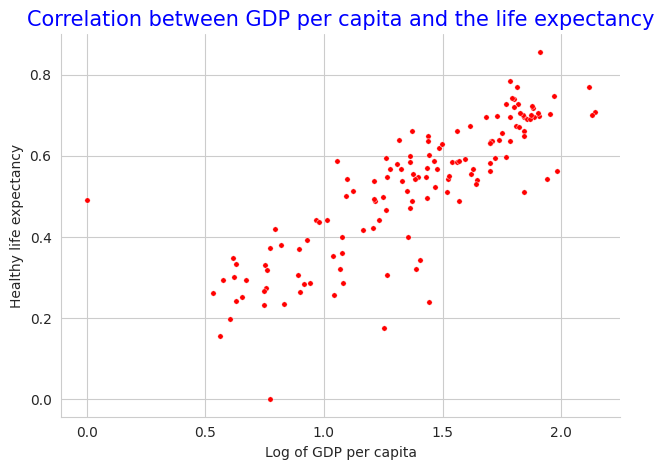

In [39]:
#Scatter plot between the GDP per capita and life expectancy to observe correlation between these two
sns.scatterplot(x = 'Log GDP per capita', y = 'Healthy life expectancy', data = df_dropna, s = 15, c = 'red')
plt.xlabel('Log of GDP per capita', fontsize = 10)
plt.ylabel('Healthy life expectancy', fontsize = 10)
plt.title('Correlation between GDP per capita and the life expectancy', fontsize = 15, c = 'b')
sns.despine()
plt.tight_layout();

In [40]:
#Correlation between GDP per capita and the Healthy life expectancy 
correlation = df_dropna['Log GDP per capita'].corr(df_dropna['Healthy life expectancy'])
print(f'The correlation between GDP per capita and the life expectancy is {correlation}.')

The correlation between GDP per capita and the life expectancy is 0.8302561727949415.


We observe that there is a strong positive correlation of 0.83 between the GDP per capita and the life expectancy across different countries. There are few outliers as well.
The obtained strong relationship between these two convey that the countries having higher GDP per capita tend to have higher life expectancy.

****